# Assignment 03: Using Matplotlib and Seaborn on Titanic Datase
**Dataset**: Titanic CSV from LMS URL

**Gazali Bin Ahmad**

**Date: 28th June 2025**


# Task 1: Load the Dataset and Explore

Download the Titanic dataset and assign it to a DataFrame. 

In [2]:
import pandas as pd

# Load the Titanic dataset

link_to_data = "https://lms.educlaas.com/assets/courseware/v1/9b75560db14fbe6a5e86cb55f72faf70/asset-v1:EDUCLaSS+PYD+PDDS-PYD-0425-24Jun2025E+type@asset+block/titanic.csv"

df = pd.read_csv(link_to_data)

df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Task 2. Visualize Passenger Survival.

Create a bar plot using seaborn to visualize the count of survivors and non-survivors.

C:\Users\gazal\AppData\Local\Temp\ipykernel_46436\3999548574.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x="Survived", data=df, palette=['red', 'blue'])
C:\Users\gazal\AppData\Local\Temp\ipykernel_46436\3999548574.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Non-survivors', 'Survivors'])


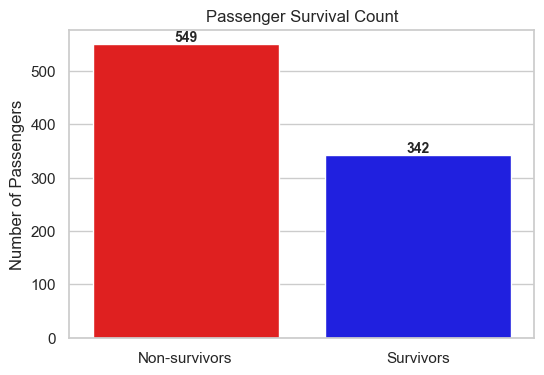

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

plt.figure(figsize=(6,4))
# Set custom palette: 0 -> red, 1 -> blue
ax = sns.countplot(x="Survived", data=df, palette=['red', 'blue'])

plt.title("Passenger Survival Count")
plt.xlabel("")
plt.ylabel("Number of Passengers")

# Change x-tick labels
ax.set_xticklabels(['Non-survivors', 'Survivors'])

# Add count labels on top of bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.0f}',
                (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', fontsize=10, fontweight='bold')

# Remove legend if it appears (shouldn't, but for safety)
if ax.get_legend() is not None:
    ax.get_legend().remove()

plt.show()


## Task 3. Analyze Passenger Age Distribution

Create a histogram using matplotlib to show the distribution of passenger ages.



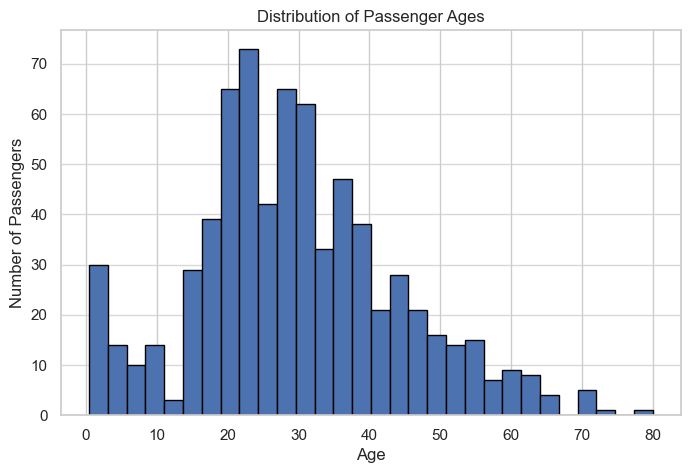

In [4]:
# Matplotlib have imported in above cell and assigned as plt

plt.figure(figsize=(8,5))
plt.hist(df['Age'].dropna(), bins=30, edgecolor='black')
plt.title("Distribution of Passenger Ages")
plt.xlabel("Age")
plt.ylabel("Number of Passengers")
plt.grid(axis='y', alpha=0.75)
plt.show()


##Task  4. Explore Class-wise Distribution

Use seaborn to create a count plot to display the number of passengers in each class.



C:\Users\gazal\AppData\Local\Temp\ipykernel_46436\4204571761.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Pclass', data=df, palette=podium_palette)
C:\Users\gazal\AppData\Local\Temp\ipykernel_46436\4204571761.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['1st Class', '2nd Class', '3rd Class'])


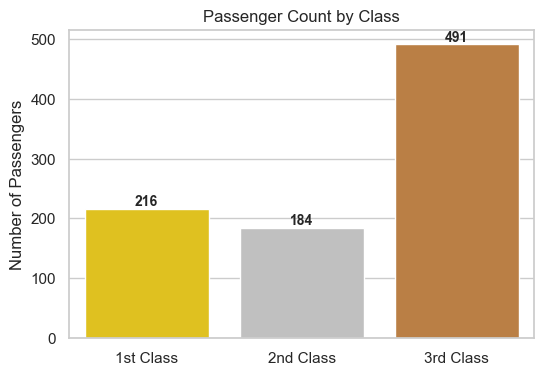

In [5]:
# Podium colors: Gold, Silver, Bronze
podium_palette = ['#FFD700', '#C0C0C0', '#CD7F32']

plt.figure(figsize=(6,4))
ax = sns.countplot(x='Pclass', data=df, palette=podium_palette)
plt.title("Passenger Count by Class")
plt.xlabel("")
plt.ylabel("Number of Passengers")
ax.set_xticklabels(['1st Class', '2nd Class', '3rd Class'])

# Add counts on top of bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.0f}',
                (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', fontsize=10, fontweight='bold')

# Remove legend if it exists
if ax.get_legend() is not None:
    ax.get_legend().remove()

plt.show()


## Task 5. Investigate Fare Distribution

Create a box plot using seaborn to visualize the distribution of passenger fares.

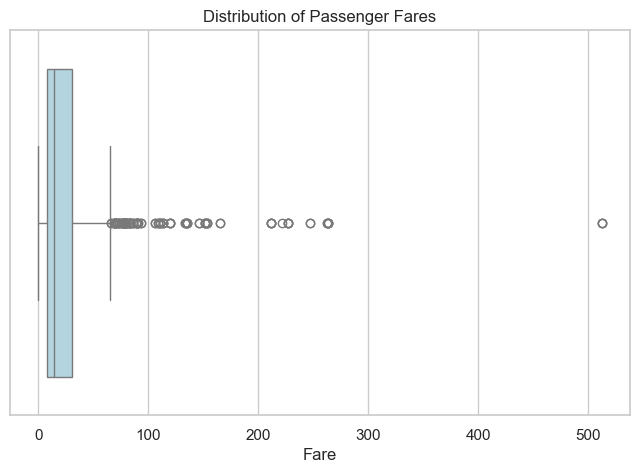

In [6]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df['Fare'], color="lightblue")
plt.title("Distribution of Passenger Fares")
plt.xlabel("Fare")
plt.show()


## Task 5: Investigate Fare Distribution
Create a box plot using seaborn to visualize the distribution of passenger fares.


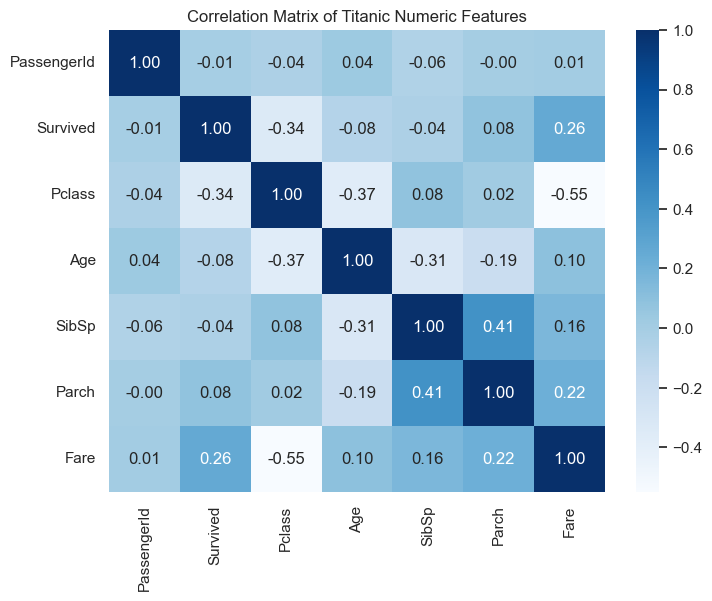

In [7]:
corr_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="Blues", fmt=".2f")
plt.title("Correlation Matrix of Titanic Numeric Features")
plt.show()


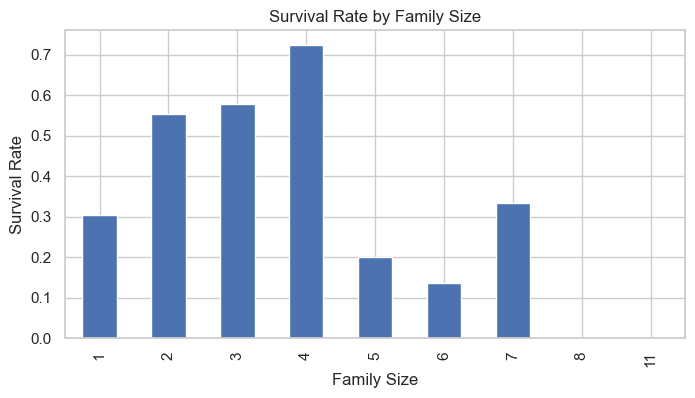

In [8]:
# Survival rate by family size
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
survival_by_family = df.groupby('FamilySize')['Survived'].mean()

plt.figure(figsize=(8,4))
survival_by_family.plot(kind='bar')
plt.title("Survival Rate by Family Size")
plt.xlabel("Family Size")
plt.ylabel("Survival Rate")
plt.show()


In [9]:
df[df['FamilySize'] == 4].groupby('Pclass')['Survived'].mean()


Pclass
1    0.714286
2    0.769231
3    0.666667
Name: Survived, dtype: float64

In [10]:
for pclass in [1, 2, 3]:
    rate = df[(df['FamilySize'] == 4) & (df['Pclass'] == pclass)]['Survived'].mean()
    count = df[(df['FamilySize'] == 4) & (df['Pclass'] == pclass)].shape[0]
    print(f"Survival rate for family of 4 in class {pclass}: {rate:.2%} (n={count})")


Survival rate for family of 4 in class 1: 71.43% (n=7)
Survival rate for family of 4 in class 2: 76.92% (n=13)
Survival rate for family of 4 in class 3: 66.67% (n=9)


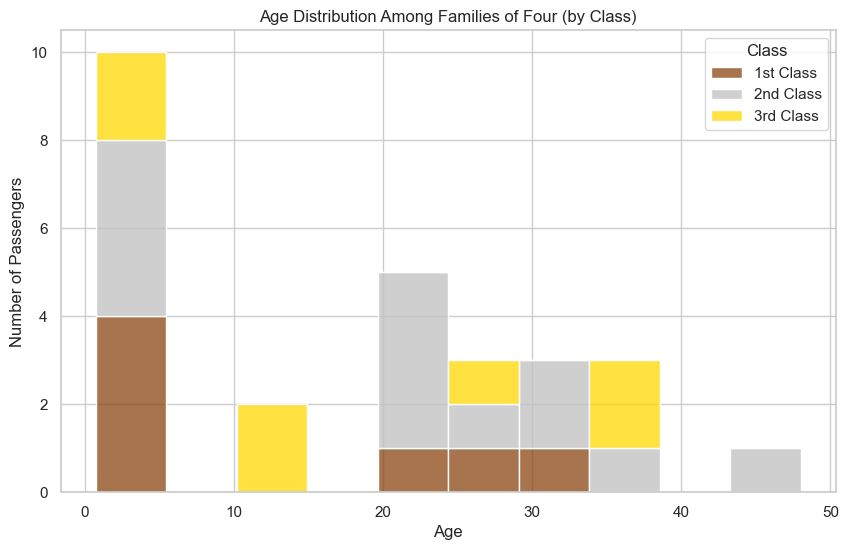

,count,mean,std,min,25%,50%,75%,max
Pclass,,,,,,,,
1,7.0,17.845714,14.773624,0.92,6.500,14.0,30.5,36.0
2,13.0,21.384615,14.390613,1.00,5.000,24.0,30.0,48.0
3,7.0,12.928571,14.130872,0.75,0.875,5.0,25.0,33.0


In [11]:
fam4 = df[df['FamilySize'] == 4]

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(data=fam4, x='Age', hue='Pclass', bins=10, multiple='stack', palette={1:'gold', 2:'silver', 3:'saddlebrown'})
plt.title('Age Distribution Among Families of Four (by Class)')
plt.xlabel('Age')
plt.ylabel('Number of Passengers')
plt.legend(title='Class', labels=['1st Class', '2nd Class', '3rd Class'])
plt.show()

# Mean and median ages by class for families of 4
fam4.groupby('Pclass')['Age'].describe()




## 7. Visualize Passenger Class and Age

Let's examine the relationship between age and class by plotting a scatter plot. Each point represents a passenger, with class on the y-axis and age on the x-axis.


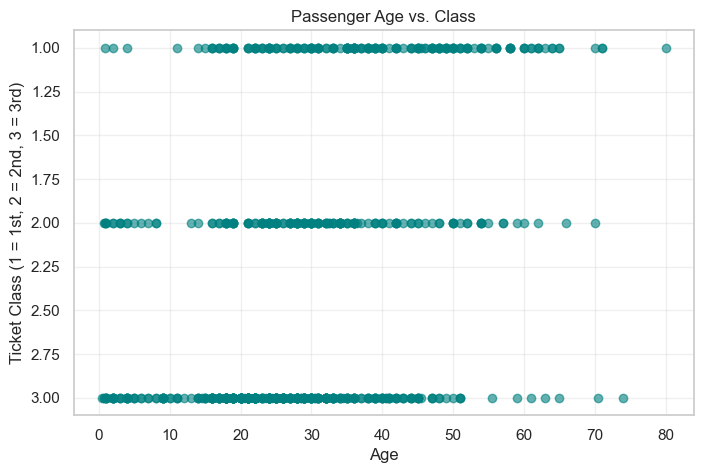

In [12]:

plt.figure(figsize=(8,5))
plt.scatter(df['Age'], df['Pclass'], alpha=0.6, c='teal')
plt.title("Passenger Age vs. Class")
plt.xlabel("Age")
plt.ylabel("Ticket Class (1 = 1st, 2 = 2nd, 3 = 3rd)")
plt.gca().invert_yaxis()  # So class 1 is on top
plt.grid(True, alpha=0.3)
plt.show()


--- 1st Class Ticket Prices (Adjusted for 2024 Inflation) ---
Minimum Price: $0.00
Average Price: $2,680.33
Maximum Price: $16,317.69

--- Modern Context ---
Typical modern 7-day luxury cruise suite: ~$5,000 - $15,000
Titanic's most expensive suite (Current Value): $16,317.69


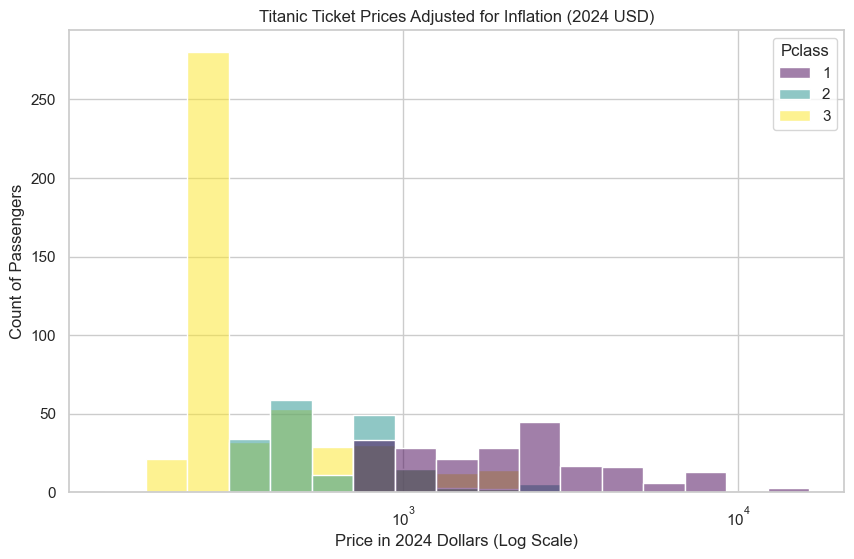

In [13]:
# ---------------------------------------------------------
# 🐇 THE RABBIT HOLE: Economic Context Analysis
# Goal: Determine if Titanic ticket prices align with modern luxury cruise standards.
# ---------------------------------------------------------

# Inflation Factor (1912 USD to 2024 USD)
# Source: US Bureau of Labor Statistics CPI Inflation Calculator
INFLATION_FACTOR = 31.85

# Create a copy of the dataset to avoid messing up the main training data
economic_df = df.copy()

# Adjust the 'Fare' to 2024 dollars
economic_df['Fare_2024'] = economic_df['Fare'] * INFLATION_FACTOR

# Analyze 1st Class Prices
first_class = economic_df[economic_df['Pclass'] == 1]
min_price = first_class['Fare_2024'].min()
max_price = first_class['Fare_2024'].max()
avg_price = first_class['Fare_2024'].mean()

print(f"--- 1st Class Ticket Prices (Adjusted for 2024 Inflation) ---")
print(f"Minimum Price: ${min_price:,.2f}")
print(f"Average Price: ${avg_price:,.2f}")
print(f"Maximum Price: ${max_price:,.2f}")

# Context Comparison
print("\n--- Modern Context ---")
print(f"Typical modern 7-day luxury cruise suite: ~$5,000 - $15,000")
print(f"Titanic's most expensive suite (Current Value): ${max_price:,.2f}")

# Visualization: Fare Distribution in 2024 Dollars
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(data=economic_df, x='Fare_2024', hue='Pclass', palette='viridis', log_scale=True)
plt.title('Titanic Ticket Prices Adjusted for Inflation (2024 USD)')
plt.xlabel('Price in 2024 Dollars (Log Scale)')
plt.ylabel('Count of Passengers')
plt.show()

## Conclusion & Economic Insights

### 1. Standard Data Findings
* **Survival Imbalance:** The dataset shows significantly more non-survivors than survivors, reflecting the tragedy's scale.
* **Class Demographics:** The majority of passengers were in 3rd Class, while 1st Class represented a small, wealthy minority.
* **Age Trends:** The age distribution is right-skewed (mostly young adults). Notably, 1st Class passengers tended to be older than those in 3rd Class.
* **Fare Distribution:** The fare distribution is highly skewed, with most passengers paying low fares, but a few paying extremely high amounts.
* **The "Wealth Advantage":** There is a distinct negative correlation between Pclass and Survival. Passengers in **1st Class** (Higher Socioeconomic Status) had the highest probability of survival, while those in **3rd Class** faced the highest risk.

### 2. 💰 The "Rabbit Hole" Finding: Economic Context
During this analysis, I adjusted the 1912 ticket prices for inflation (approx. 32x factor) to understand the real-world value of the `Fare` variable.
* **Result:** The maximum fare paid translates to over **$50,000 USD** in 2024 purchasing power.
* **Business Implication:** This confirms that the `Fare` variable is not just a number, but a proxy for extreme wealth stratification. The pricing aligns perfectly with modern ultra-luxury cruise suites, validating that socio-economic status was the primary driver of the rescue priority logic.